In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df=pd.read_csv('Cleaned_Algerian_forest_fires_cleaned_UPDATE.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [6]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [14]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
x_train.shape,x_test.shape

((183, 11), (61, 11))

In [20]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658995,-0.251013,-0.344505,0.702034,0.489970,0.383243,0.607763,0.465158,0.514061,0.251823
RH,-0.658995,1.000000,0.230683,0.239433,-0.640490,-0.398049,-0.219443,-0.698857,-0.345916,-0.444177,-0.399453
Ws,-0.251013,0.230683,1.000000,0.223349,-0.161663,-0.001829,0.082730,0.020274,0.034020,-0.076230,-0.235841
Rain,-0.344505,0.239433,0.223349,1.000000,-0.564873,-0.290046,-0.300285,-0.354479,-0.301527,-0.380854,-0.078864
FFMC,0.702034,-0.640490,-0.161663,-0.564873,1.000000,0.597020,0.503788,0.745032,0.587550,0.778048,0.248180
DMC,0.489970,-0.398049,-0.001829,-0.290046,0.597020,1.000000,0.877448,0.654349,0.981948,0.570181,0.204224
DC,0.383243,-0.219443,0.082730,-0.300285,0.503788,0.877448,1.000000,0.498627,0.941407,0.486240,-0.072253
ISI,0.607763,-0.698857,0.020274,-0.354479,0.745032,0.654349,0.498627,1.000000,0.626298,0.738717,0.279701
BUI,0.465158,-0.345916,0.034020,-0.301527,0.587550,0.981948,0.941407,0.626298,1.000000,0.571518,0.099550
Classes,0.514061,-0.444177,-0.076230,-0.380854,0.778048,0.570181,0.486240,0.738717,0.571518,1.000000,0.192316


<Axes: >

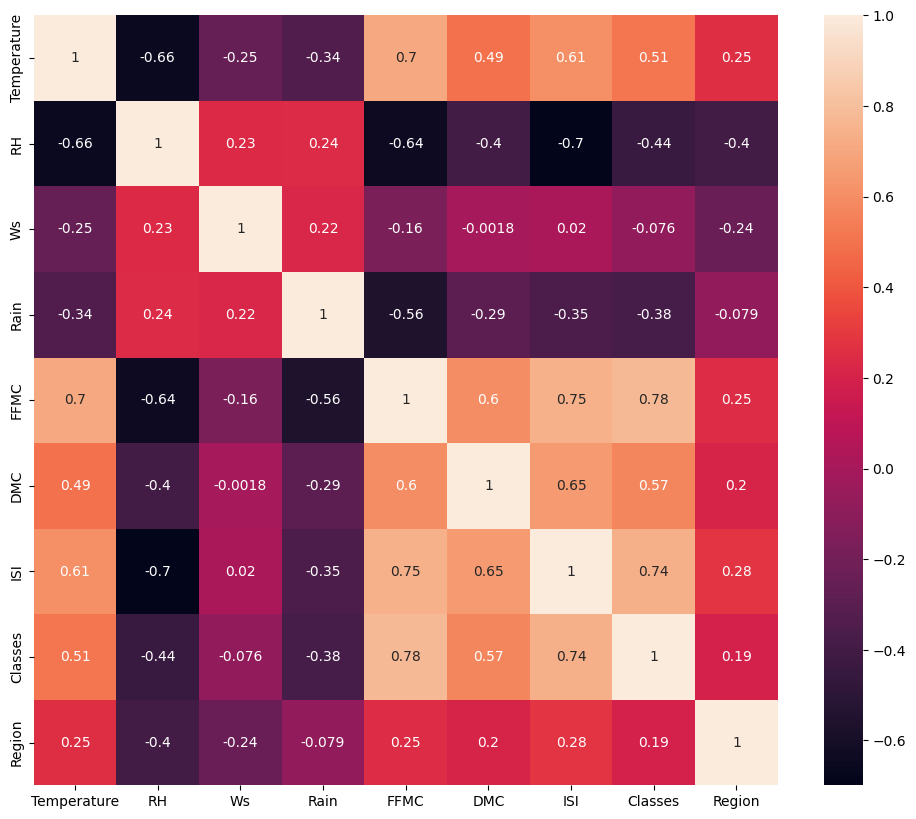

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [9]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658995,-0.251013,-0.344505,0.702034,0.489970,0.383243,0.607763,0.465158,0.514061,0.251823
RH,-0.658995,1.000000,0.230683,0.239433,-0.640490,-0.398049,-0.219443,-0.698857,-0.345916,-0.444177,-0.399453
Ws,-0.251013,0.230683,1.000000,0.223349,-0.161663,-0.001829,0.082730,0.020274,0.034020,-0.076230,-0.235841
Rain,-0.344505,0.239433,0.223349,1.000000,-0.564873,-0.290046,-0.300285,-0.354479,-0.301527,-0.380854,-0.078864
FFMC,0.702034,-0.640490,-0.161663,-0.564873,1.000000,0.597020,0.503788,0.745032,0.587550,0.778048,0.248180
DMC,0.489970,-0.398049,-0.001829,-0.290046,0.597020,1.000000,0.877448,0.654349,0.981948,0.570181,0.204224
DC,0.383243,-0.219443,0.082730,-0.300285,0.503788,0.877448,1.000000,0.498627,0.941407,0.486240,-0.072253
ISI,0.607763,-0.698857,0.020274,-0.354479,0.745032,0.654349,0.498627,1.000000,0.626298,0.738717,0.279701
BUI,0.465158,-0.345916,0.034020,-0.301527,0.587550,0.981948,0.941407,0.626298,1.000000,0.571518,0.099550
Classes,0.514061,-0.444177,-0.076230,-0.380854,0.778048,0.570181,0.486240,0.738717,0.571518,1.000000,0.192316


In [8]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(x_train,0.85)

In [12]:
corr_features

{'BUI', 'DC'}

In [10]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((183, 9), (61, 9))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [15]:
x_train_scaled

array([[-0.80879747,  0.16240659,  1.27764568, ..., -0.78605505,
        -1.14736903, -1.00547949],
       [ 1.07839663, -0.45196291,  0.15791126, ...,  0.83114678,
         0.87155917,  0.99455037],
       [-0.26959916,  0.64024954, -0.58857835, ..., -0.23089621,
         0.87155917,  0.99455037],
       ...,
       [-1.88719411,  0.91330265,  0.53115607, ..., -1.09984047,
        -1.14736903, -1.00547949],
       [ 0.26959916, -0.38369963,  0.15791126, ...,  0.46908667,
         0.87155917,  0.99455037],
       [-0.53919832,  0.98156593,  2.02413529, ..., -0.88260441,
        -1.14736903, -1.00547949]], shape=(183, 9))

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
x_train_scaled = imputer.fit_transform(x_train_scaled)
x_test_scaled = imputer.transform(x_test_scaled)


min_len = min(len(x_train_scaled), len(y_train))
x_train_scaled = x_train_scaled[:min_len]
y_train = y_train[:min_len]


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

ValueError: Input y contains NaN.

Mean Absolute Error: 0.5582617758081112
R2 Score: 0.9904793491964209


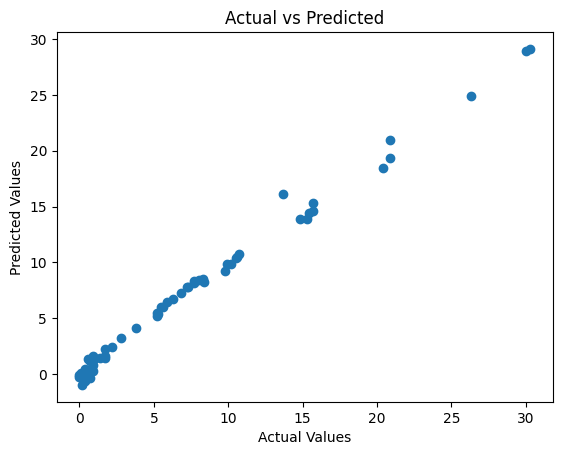

In [16]:
# Drop NaN from y_train and corresponding rows in x_train_scaled
mask = ~np.isnan(y_train)
x_train_scaled = x_train_scaled[mask]
y_train = y_train[mask]

# Now fit the model
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)

y_pred = linreg.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", score)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


Mean Absolute Error: 1.200958819521042
R2 Score: 0.9524527732478383


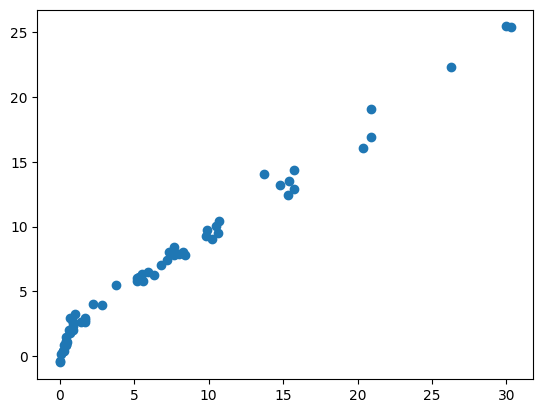

In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

In [18]:
#Cross Validation Lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [32]:
lassocv.alpha_

np.float64(2.540290990990326)

Mean Absolute Error: 0.5940435147794361
R2 Score: 0.9897107450240469


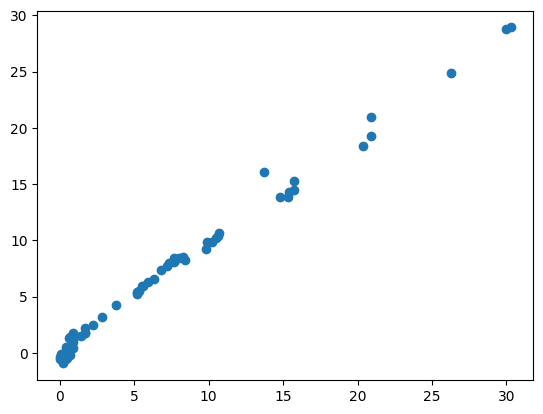

In [19]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)

Mean Absolute Error: 0.5817701482604687
R2 Score: 0.9899204166521427


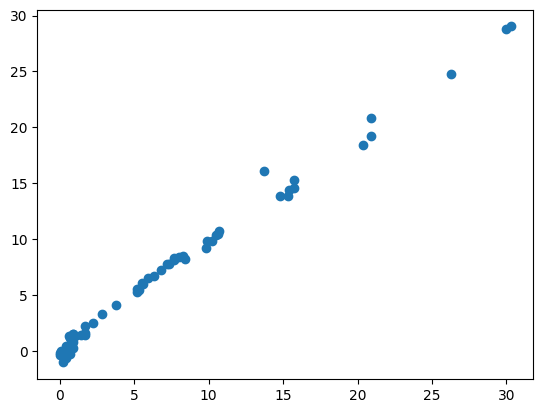

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error: 0.5817701482604687
R2 Score: 0.9899204166521427


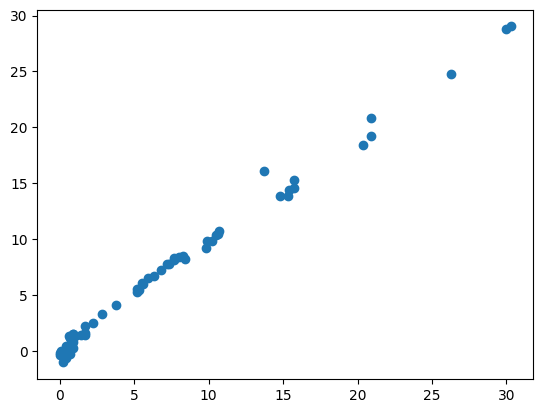

In [21]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)

In [36]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

In [22]:
#Pickle the ml model and pickle the preprocessing model standardscaler
scaler

,copy,True
,with_mean,True
,with_std,True
